# LGBM

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss, matthews_corrcoef
from lightgbm import LGBMClassifier  # Import LGBMClassifier

In [2]:
#input of train data
data = pd.read_csv("trainset_2168.csv")

In [3]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df

,ATSC5d,ATSC4i,SlogP_VSA1,GATS2v,VSA_EState6,ATSC5p,ATSC3v,AATSC0are,ATSC5v,FilterItLogS,...,MATS2Z,GATS2m,AATS2i,AATSC0Z,MATS2i,ATSC3i,VSA_EState6.1,ATSC7Z,ATSC7d,Target
0,-2.728889,-25.325082,14.790515,0.805420,3.984015,-6.612719,398.502575,0.125251,-545.754350,-4.559571,...,0.042195,0.579042,159.995844,28.773333,0.119289,12.574040,-6.861521,-499.031111,3.008889,0
1,-0.013172,-9.509606,0.000000,1.188261,10.457433,0.836143,-244.755691,0.056368,286.027058,-4.072640,...,-0.070246,1.164533,153.088486,6.491990,-0.059652,-3.837482,-8.393922,-92.979708,-7.561410,0
2,-8.746667,19.078029,11.050456,0.943259,5.410910,-2.265468,-543.310893,0.095132,-222.679922,-2.797881,...,0.193372,0.767330,155.950676,7.115556,-0.036548,-13.213895,-7.304433,-204.328889,3.671111,0
3,-7.500000,7.298561,0.000000,1.064240,-1.142632,-2.915553,-899.923918,0.142939,-523.700577,-4.546686,...,0.056348,0.951546,155.401583,7.629378,-0.003948,-23.880483,-17.782129,44.177627,-13.250000,0
4,0.979994,-54.298523,0.000000,0.999246,4.309280,-3.544286,-823.626996,0.053800,-493.778160,-4.851646,...,0.056962,0.963492,148.280834,6.573099,0.093608,-14.915751,-7.269271,-34.333333,2.309326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,-2.785000,-2.962981,5.316789,1.053967,6.411154,-1.169308,-370.566598,0.156703,-331.812834,-1.586460,...,0.104734,0.739404,152.740651,7.700000,-0.248710,1.145958,-3.199700,-63.000000,2.282500,1
2164,-2.207908,-18.038352,0.000000,0.815257,9.328611,2.336778,-490.408818,0.084582,295.652771,-2.133108,...,0.079423,0.916667,158.894061,6.959184,0.277052,-7.050913,-9.365004,-8.285714,0.232143,1
2165,1.102273,-28.881507,5.316789,0.908729,6.506799,-2.353837,-1289.670230,0.152006,-997.066785,-2.253884,...,0.115811,0.909485,153.576879,10.671488,0.044511,-17.510129,-17.513844,123.568182,-2.732955,1
2166,-11.248959,-22.799880,10.633577,1.093079,9.120382,-2.371401,-1110.406849,0.195666,-338.916459,-3.060512,...,0.073244,0.668509,157.460655,10.330887,-0.081357,-3.845589,-16.116821,-25.806784,-7.429875,1


In [4]:
y= df.Target
X=df.drop('Target', axis=1)

In [5]:
X

,ATSC5d,ATSC4i,SlogP_VSA1,GATS2v,VSA_EState6,ATSC5p,ATSC3v,AATSC0are,ATSC5v,FilterItLogS,...,VSA_EState3.1,MATS2Z,GATS2m,AATS2i,AATSC0Z,MATS2i,ATSC3i,VSA_EState6.1,ATSC7Z,ATSC7d
0,-2.728889,-25.325082,14.790515,0.805420,3.984015,-6.612719,398.502575,0.125251,-545.754350,-4.559571,...,-1.067962,0.042195,0.579042,159.995844,28.773333,0.119289,12.574040,-6.861521,-499.031111,3.008889
1,-0.013172,-9.509606,0.000000,1.188261,10.457433,0.836143,-244.755691,0.056368,286.027058,-4.072640,...,4.438008,-0.070246,1.164533,153.088486,6.491990,-0.059652,-3.837482,-8.393922,-92.979708,-7.561410
2,-8.746667,19.078029,11.050456,0.943259,5.410910,-2.265468,-543.310893,0.095132,-222.679922,-2.797881,...,-0.616690,0.193372,0.767330,155.950676,7.115556,-0.036548,-13.213895,-7.304433,-204.328889,3.671111
3,-7.500000,7.298561,0.000000,1.064240,-1.142632,-2.915553,-899.923918,0.142939,-523.700577,-4.546686,...,11.762528,0.056348,0.951546,155.401583,7.629378,-0.003948,-23.880483,-17.782129,44.177627,-13.250000
4,0.979994,-54.298523,0.000000,0.999246,4.309280,-3.544286,-823.626996,0.053800,-493.778160,-4.851646,...,4.009655,0.056962,0.963492,148.280834,6.573099,0.093608,-14.915751,-7.269271,-34.333333,2.309326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,-2.785000,-2.962981,5.316789,1.053967,6.411154,-1.169308,-370.566598,0.156703,-331.812834,-1.586460,...,3.766862,0.104734,0.739404,152.740651,7.700000,-0.248710,1.145958,-3.199700,-63.000000,2.282500
2164,-2.207908,-18.038352,0.000000,0.815257,9.328611,2.336778,-490.408818,0.084582,295.652771,-2.133108,...,0.000000,0.079423,0.916667,158.894061,6.959184,0.277052,-7.050913,-9.365004,-8.285714,0.232143
2165,1.102273,-28.881507,5.316789,0.908729,6.506799,-2.353837,-1289.670230,0.152006,-997.066785,-2.253884,...,-0.732235,0.115811,0.909485,153.576879,10.671488,0.044511,-17.510129,-17.513844,123.568182,-2.732955
2166,-11.248959,-22.799880,10.633577,1.093079,9.120382,-2.371401,-1110.406849,0.195666,-338.916459,-3.060512,...,17.101126,0.073244,0.668509,157.460655,10.330887,-0.081357,-3.845589,-16.116821,-25.806784,-7.429875


In [6]:
cat_features=list(range(0,X.shape[1]))
cat_features

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [7]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

In [8]:
x_train = x_train.T
y_train = y_train.T

In [10]:
from lightgbm import LGBMClassifier
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_depth': 10,
    'min_child_samples': 2,
    'min_child_weight': 1,
    'subsample': 0.4,  # Equivalent to colsample_bytree
    'num_leaves': 50,  # Set num_leaves explicitly
    'random_state': 42
}

# Instantiate LGBMClassifier with parameters
lgbm_classifier = LGBMClassifier(**lgbm_params)

# Fit the LGBM model
lgbm_classifier.fit(x_train.T, y_train.T)

# Calculate accuracy on the training set
acc_train = lgbm_classifier.score(x_train.T, y_train.T) * 100
print(acc_train)

[LightGBM] [Info] Number of positive: 1718, number of negative: 450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15165
[LightGBM] [Info] Number of data points in the train set: 2168, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792435 -> initscore=1.339669
[LightGBM] [Info] Start training from score 1.339669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Info] Number of positive: 1546, number of negative: 405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15154
[LightGBM] [Info] Number of data points in the train set: 1951, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792414 -> initscore=1.339539
[LightGBM] [Info] Start training from score 1.339539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15155
[LightGBM] [Info] Number of data points in the train set: 1951, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792414 -> initscore=1.339539
[LightGBM] [Info] Start training from score 1.339539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<Figure size 4200x3000 with 0 Axes>

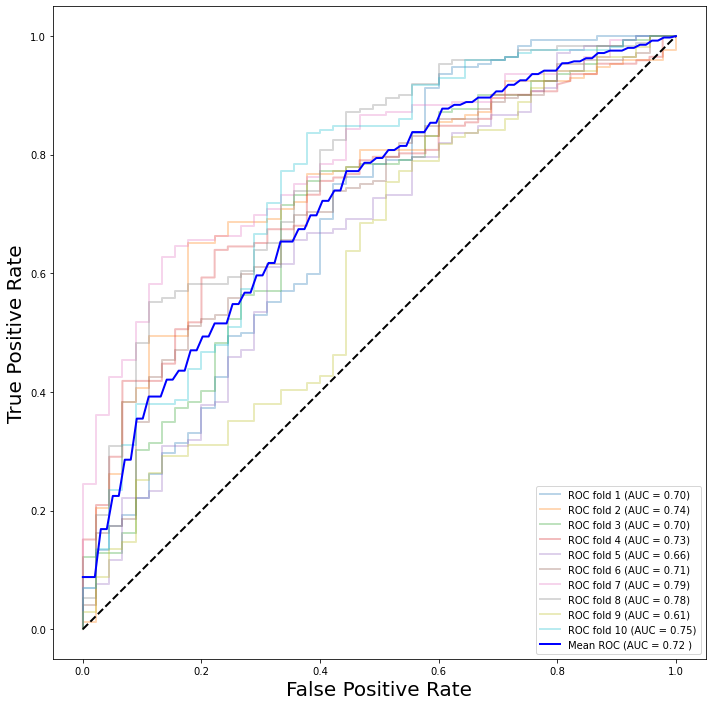

In [11]:
# plot k fold ROC

# 10 fold cross validation of train set
from sklearn.metrics import RocCurveDisplay

from numpy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

plt.figure(figsize=(7, 5), dpi=600)
x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = lgbm_classifier.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.savefig('LGBM_kfold.png', dpi=600, bbox_inches='tight')
plt.show()

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

k_folds = 10  # Number of folds
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)  # StratifiedKFold for classification
accuracy_scores = []  # To store accuracy scores of each fold

for fold, (train_index, val_index) in enumerate(skf.split(x_train, y_train), 1):
    print(f"Fold {fold}/{k_folds}")
    X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
    # Calculate accuracy on validation data
    accuracy = lgbm_classifier.score(X_val_fold, y_val_fold)
    accuracy_scores.append(accuracy)
    print(f"Validation Accuracy: {accuracy}")

# Print average accuracy across all folds
print(f"Average Validation Accuracy: {np.mean(accuracy_scores)}")


Fold 1/10
Validation Accuracy: 0.9723502304147466
Fold 2/10
Validation Accuracy: 0.9723502304147466
Fold 3/10
Validation Accuracy: 0.9723502304147466
Fold 4/10
Validation Accuracy: 0.9723502304147466
Fold 5/10
Validation Accuracy: 0.9815668202764977
Fold 6/10
Validation Accuracy: 0.967741935483871
Fold 7/10
Validation Accuracy: 0.9723502304147466
Fold 8/10
Validation Accuracy: 0.9493087557603687
Fold 9/10
Validation Accuracy: 0.9814814814814815
Fold 10/10
Validation Accuracy: 0.9722222222222222
Average Validation Accuracy: 0.9714072367298172


# Test Set

In [13]:
#Read the validation Test set
v_test_data = pd.read_csv("testset_480.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(480, 61)

In [14]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)

In [15]:
v_predictions = lgbm_classifier.predict(X_v_test_data)
v_acc_test = lgbm_classifier.score(X_v_test_data, Y_v_test_data)*100
print(v_acc_test)

86.04166666666667


In [16]:
# performance metrics to calculate
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)


Accuracy:86.042
Sensitivity:0.925
Specificity:0.537
Balance accuracy:0.731
MCC: 0.480
AUC: 0.731
Brier_loss: 0.140
False Postive rate: 0.463
False Negative rate: 0.075
Precision: 0.909
Recall: 0.925
F1: 0.917
Kappa: 0.479


In [17]:
# confusion matrix
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56        80
           1       0.91      0.93      0.92       400

    accuracy                           0.86       480
   macro avg       0.75      0.73      0.74       480
weighted avg       0.86      0.86      0.86       480



<AxesSubplot:xlabel='Predicted Value', ylabel='True Value'>

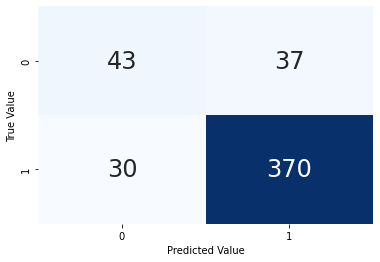

In [18]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [19]:
fig = cf_plt.get_figure()
fig.savefig("LGBM_Con_mat.png") 

In [20]:
m2= lgbm_classifier.predict_proba(X_v_test_data)
m2 = pd.DataFrame(m2)
m2.to_csv("LGBM_Probabs.csv")

In [24]:
import pandas as pd

# Assuming `rf` is your trained Random Forest classifier and `X_v_test_data` is your test data

# Predict probabilities
m2_probs = lgbm_classifier.predict_proba(X_v_test_data)

# Convert probabilities to binary predictions
m2_binary = (m2_probs[:, 1] > 0.5).astype(int)

# Create a DataFrame with binary predictions
m2_binary_df = pd.DataFrame(m2_binary, columns=['Predicted_Class'])

# Save to CSV
m2_binary_df.to_csv("LGBM_Probabs_Binary.csv", index=False)

In [25]:
# ROC - AUC curve 
r_probs = [0 for _ in range(len(Y_v_test_data))]
lgbm_classifier = lgbm_classifier.predict_proba(X_v_test_data)
lgbm_classifier = lgbm_classifier[:,1]

In [26]:
r_auc_score = roc_auc_score(Y_v_test_data, lgbm_classifier)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, lgbm_classifier)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.81675


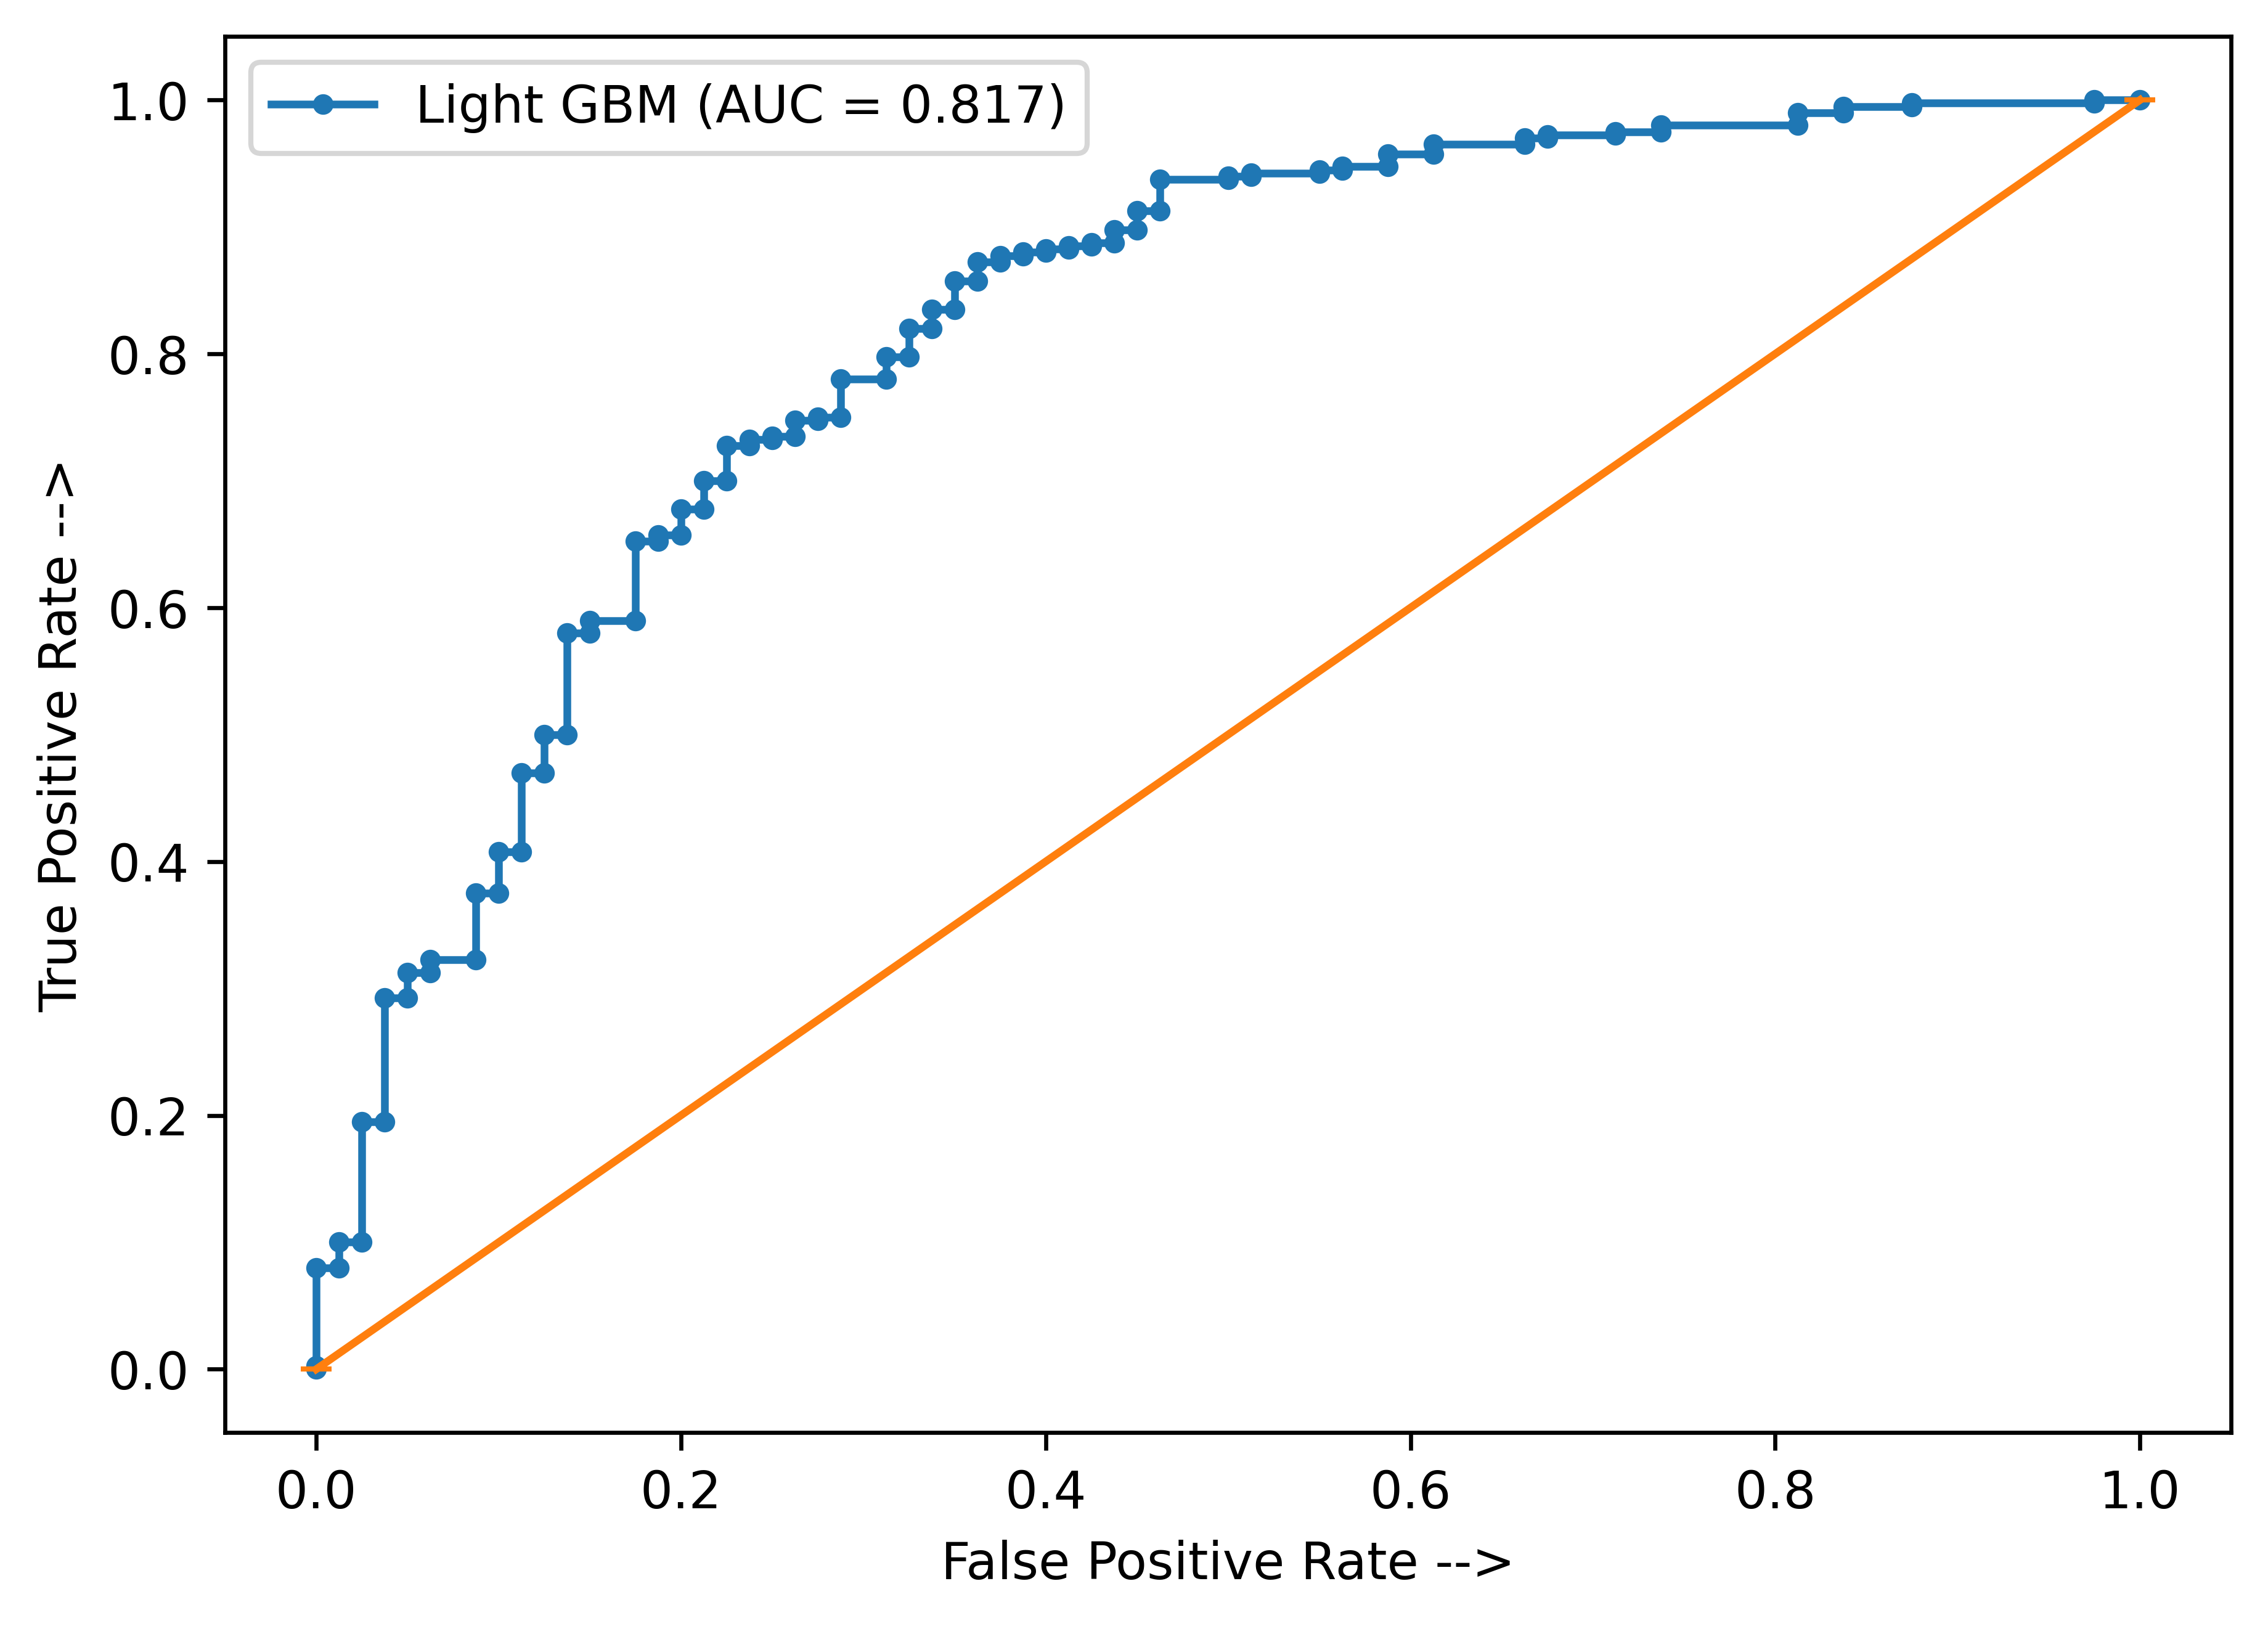

In [27]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='Light GBM (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.savefig('LGBM_AUC.png', dpi=600, bbox_inches='tight')
plt.show()


[LightGBM] [Info] Number of positive: 400, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9048
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.833333 -> initscore=1.609438
[LightGBM] [Info] Start training from score 1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

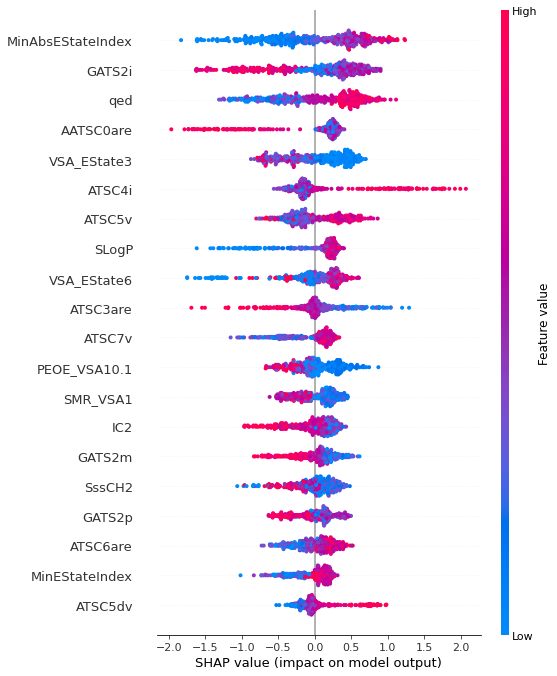

In [24]:
import shap
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming v_test_data is your dataset
#Y_v_test_data = v_test_data['Target']
#X_v_test_data = v_test_data.drop('Target', axis=1)

# Train LightGBM model
#lgbm_model = lgb.LGBMClassifier()
lgbm_classifier.fit(X_v_test_data, Y_v_test_data)

# Create a SHAP explainer
explainer = shap.Explainer(lgbm_model, X_v_test_data)

# Calculate SHAP values
shap_values = explainer.shap_values(X_v_test_data)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_v_test_data)

In [28]:
import shap
import matplotlib as plt
def model_predict(x_train):
    return lgbm_classifier.predict(x_train)

masker = shap.maskers.Independent(X_v_test_data)

explainer = shap.Explainer(model_predict, masker)

shap_values = explainer(X_v_test_data)

shap.summary_plot(shap_values, X_v_test_data, show=False)
plt.savefig('LGBM_shap_summary_plot.png')
plt.close()

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

# Probability prediction

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

# Load data from Excel file
data = pd.read_csv("D:\\Orchid_Baruah\\New\\April\\Final_dataset\\Test.csv")

# Assuming 'Target' is the column containing the target variable
y = data['Target']  # Target variable

# Split the data into features (excluding 'Target')
X = data.drop('Target', axis=1)

# Split the data into training and testing sets
# Note: Since you don't have features, you'll just split the target variable
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = LGBMClassifier()

# Fit the model on the training data (which is just the target variable)
model.fit(y_train.to_frame(), y_train)

# Predict probabilities for the test set
probabilities = model.predict_proba(y_test.to_frame())

# Assuming '1' is the class of interest, you can get the probabilities of '1'
# by accessing the second column of the predicted probabilities
probability_of_target = probabilities[:, 1]

# Convert probabilities to binary values (1 or 0) based on a threshold (e.g., 0.5)
threshold = 0.5
binary_predictions = (probability_of_target >= threshold).astype(int)

# Create a DataFrame to store the binary predictions and predicted probabilities
result_df = pd.DataFrame({'Target': y_test, 'Predicted_Probability': probability_of_target, 'Binary_Predictions': binary_predictions})

# Save the DataFrame to an Excel file
result_df.to_excel("D:\\Orchid_Baruah\\New\\April\\11 April\\Probabs\\LGBM_Probabs.xlsx", index=False)


[LightGBM] [Info] Number of positive: 323, number of negative: 61
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.841146 -> initscore=1.666778
[LightGBM] [Info] Start training from score 1.666778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

# Load data from Excel file
data = pd.read_csv("D:\\Orchid_Baruah\\New\\April\\Final_dataset\\Test_with_smiles.csv")

# Extracting features (SMILES) and target labels
X_smiles = data['SMILES']  # Features (SMILES)
y = data['Target']  # Target labels

# Split the data into training and testing sets
X_train_smiles, X_test_smiles, y_train, y_test = train_test_split(X_smiles, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = LGBMClassifier()

# Random Forest requires numerical input, so we will use placeholder features
X_train = X_train_smiles.index.to_numpy().reshape(-1, 1)
y_train = y_train
X_test = X_test_smiles.index.to_numpy().reshape(-1, 1)

# Train the RandomForestClassifier
model.fit(X_train, y_train)

# Predict probabilities for the entire dataset
probabilities = model.predict_proba(data.index.to_numpy().reshape(-1, 1))

# Assuming '1' is the class of interest, you can get the probabilities of '1'
# by accessing the second column of the predicted probabilities
probability_of_target = probabilities[:, 1]

# Convert probabilities to binary values (1 or 0) based on a threshold (e.g., 0.5)
threshold = 0.4
binary_predictions = (probability_of_target >= threshold).astype(int)

# Add the binary predictions to the DataFrame
data['Predicted_Probability'] = binary_predictions

# Save the DataFrame to a new Excel file
data.to_excel("D:\\Orchid_Baruah\\New\\April\\11 April\\Probabs\\LGBM_Probabs.xlsx", index=False)


[LightGBM] [Info] Number of positive: 323, number of negative: 61
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.841146 -> initscore=1.666778
[LightGBM] [Info] Start training from score 1.666778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai